Лабораторная работа №2, Вариант 11

Цель работы: изучить программные средства, используемые для визуализации
наборов данных.

Выполнение работы
Следует получить у преподавателя индивидуальный вариант задания, связанного
с анализом данных конкретной предметной области. Файл данных находится либо в
облачном ресурсе, либо в сети. Необходимо подключить этот файл, скачать оттуда
данные в свой ноутбук Jupyter, поместить данные в объект DataFrame и провести
первичный анализ данных в заданной предметной области.
Особое внимание следует уделить графическому представлению распределений
признаков, визуализации взаимосвязей, позволяющие судить о наборе данных.
Построение графиков желательно произвести по нескольким проекциям. При анализе
данных использовать как можно более разнообразные типы графиков.

Датасет – juice.csv

Набор данных содержит сведения о 1070 покупках, в ходе которых клиент при-
обрел апельсиновый сок Citrus Hill или Minute Maid. Регистрируется ряд характери-
стик клиента и продукта.

Атрибуты:
• Purchase – коэффициент с уровнями CH и MM, указывающий, купил ли клиент
апельсиновый сок Citrus Hill или Minute Maid (целевая переменная)
• WeekofPurchase – неделя с момента покупки
• StoreID – идентификатор магазина
• PriceCH – цена, взимаемая за CH
• PriceMM – цена, взимаемая за ММ
• DiscCH – cкидка, предлагаемая для CH
• Disc MM – cкидка, предлагаемая для MM
• SpecialCH – индикатор специальной цены на CH
• Special MM – индикатор специальной цены на ММ
• LoyalCH – лояльность клиентов к бренду для CH
• SalePriceMM – цена продажи ММ
• SalePriceCH – цена продажи CH
• Price Diff – разница в ценах, насколько цена ММ меньше продажной цены CH
• Store 7 – коэффициент с уровнями "Нет" и "Да", указывающий, проводится ли
продажа в магазине No7
• PctDiscMM – процентная скидка для ММ
• PctDiscCH – процентная скидка в СН
• ListPriceDiff – разница в прейскурантной цене ММ за вычетом прейскурант-
ной цены CH
• STORE – в каком из 5 возможных магазинов произошла продажа

### 1. Импорт необходимых библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Импортируем набор данных из файла juice.csv и поместим его в объект DateFrame

In [35]:
df = pd.read_csv('juice.csv')
df.head(10)

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,7,CH,232,7,1.69,1.99,0.00,0.4,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,8,CH,234,7,1.75,1.99,0.00,0.4,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,9,CH,235,7,1.75,1.99,0.00,0.4,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,10,CH,238,7,1.75,1.99,0.00,0.4,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


### 3. Получим сводную информацию по датафрейму

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   Purchase        1070 non-null   object 
 2   WeekofPurchase  1070 non-null   int64  
 3   StoreID         1070 non-null   int64  
 4   PriceCH         1070 non-null   float64
 5   PriceMM         1070 non-null   float64
 6   DiscCH          1070 non-null   float64
 7   DiscMM          1070 non-null   float64
 8   SpecialCH       1070 non-null   int64  
 9   SpecialMM       1070 non-null   int64  
 10  LoyalCH         1070 non-null   float64
 11  SalePriceMM     1070 non-null   float64
 12  SalePriceCH     1070 non-null   float64
 13  PriceDiff       1070 non-null   float64
 14  Store7          1070 non-null   object 
 15  PctDiscMM       1070 non-null   float64
 16  PctDiscCH       1070 non-null   float64
 17  ListPriceDiff   1070 non-null   f

### 4. Визуализация количественных признаков

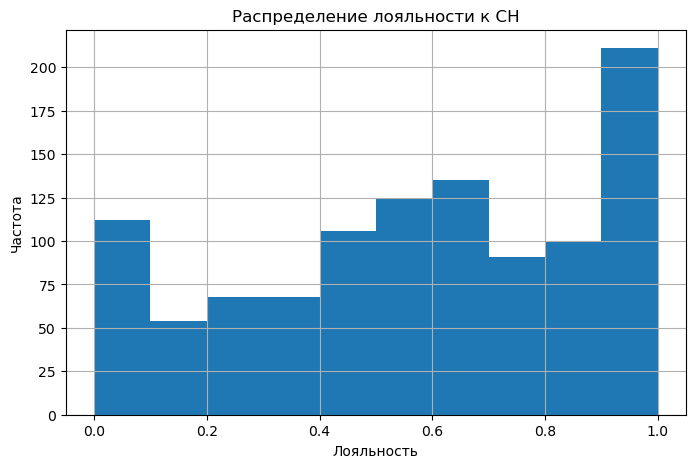

In [19]:
# Применение pandas для визуализации данных
# pandas работает как настройка над matplotlib
df['LoyalCH'].hist(figsize=(8, 5))
plt.title('Распределение лояльности к CH')
plt.xlabel('Лояльность')
plt.ylabel('Частота')
plt.show()

Изменим размер фигуры и применим метод hist() для визуализации распределения нескольких признаков

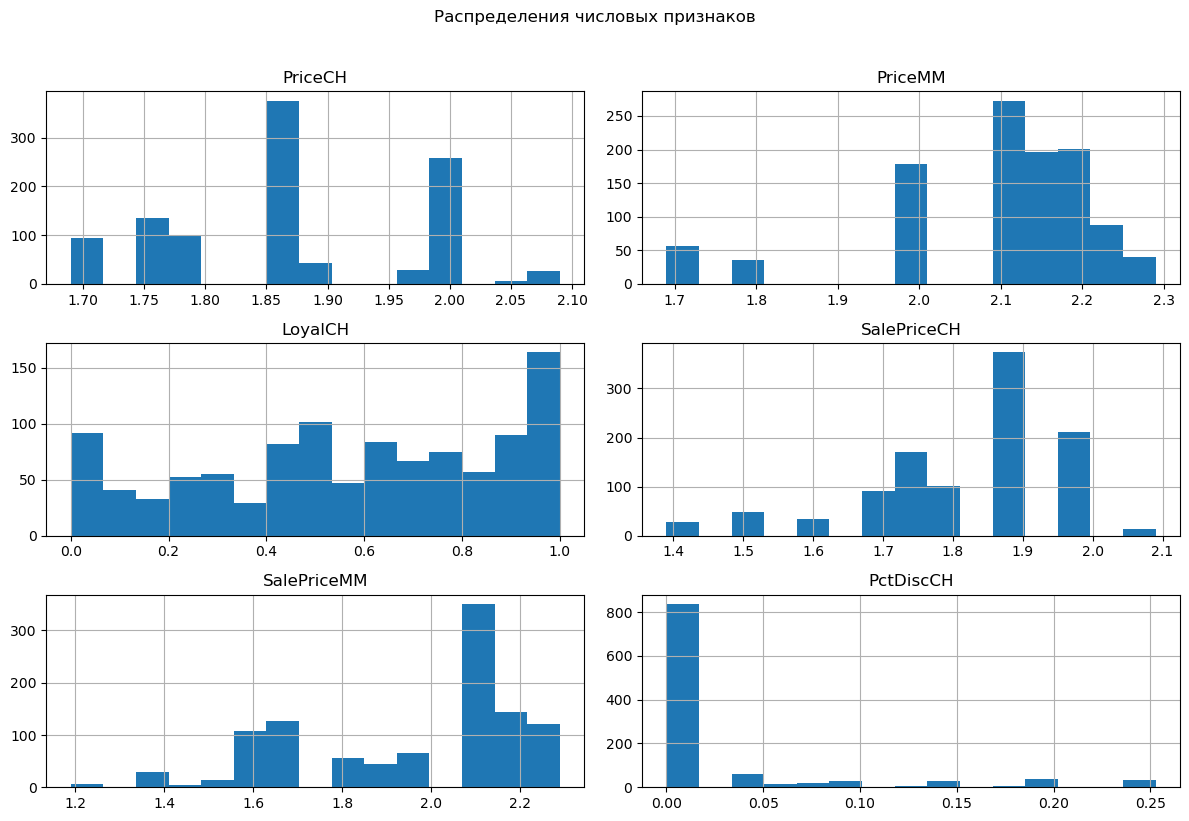

In [20]:
numerical_features = ['PriceCH', 'PriceMM', 'LoyalCH', 'SalePriceCH', 'SalePriceMM', 'PctDiscCH']
juice_df[numerical_features].hist(figsize=(12, 8), bins=15)
plt.suptitle('Распределения числовых признаков', y=1.02)
plt.tight_layout()
plt.show()

Аналогичный тип графика можно получить с использованиме matplotlib

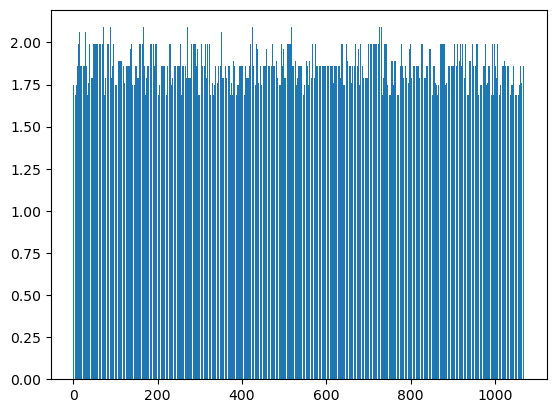

In [21]:
plt.bar(df.index, df['PriceCH'])
plt.show()

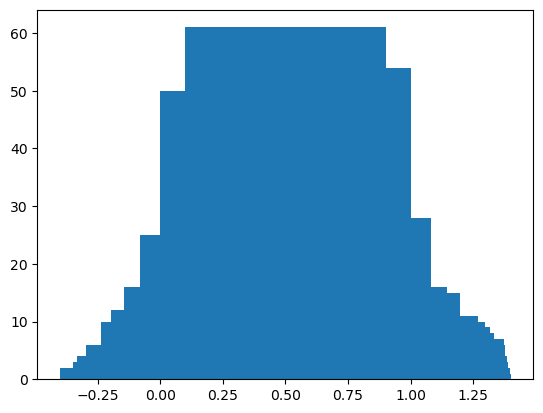

In [28]:
# График распределения PriceCH
hist = df['LoyalCH'].value_counts()
plt.bar(hist.index, hist.values)
plt.show()

Использование Seaborn
Построение диаграммы типа "ящик с усами"
По диаграмме можно определить медиану, квартили,
Интерквартильный размах, выбросы

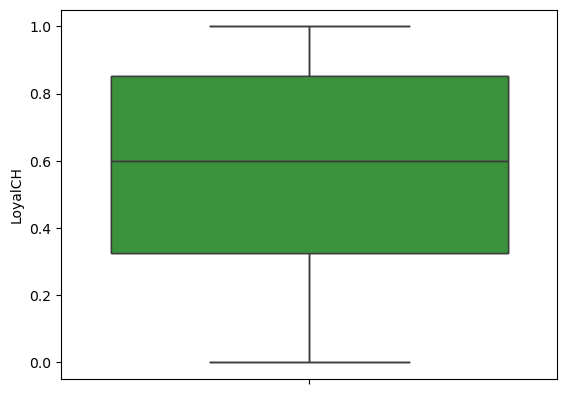

In [31]:
sns.boxplot(df['LoyalCH'])
plt.show()

Ниже представлен код для анализа 3 магазинов с максимальной лояльностью

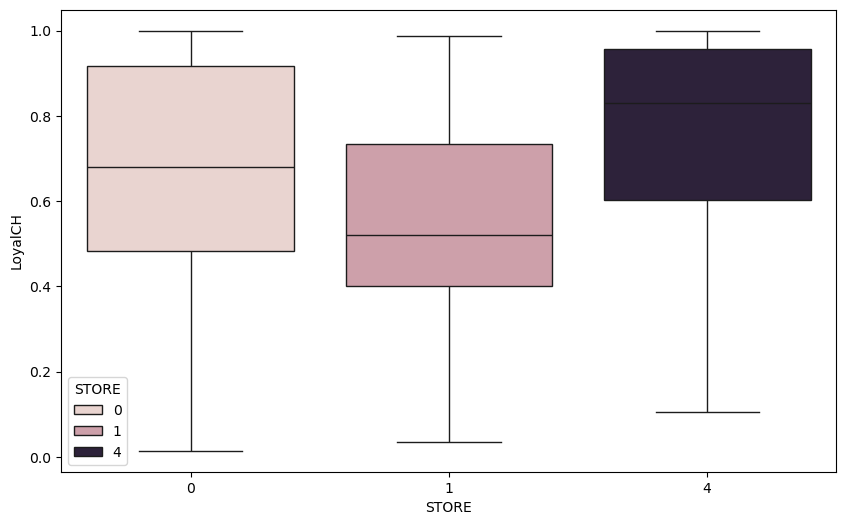

In [32]:
store_loyalty = df.groupby('STORE')['LoyalCH'].mean()
top_stores = store_loyalty.nlargest(3).index

plt.figure(figsize=(10, 6))
sns.boxplot(data=juice_df[juice_df['STORE'].isin(top_stores)], 
            x='STORE', y='LoyalCH', hue='STORE')
plt.show()

### 5. Визуализация категориальных признаков

In [36]:
df['Store7'].value_counts()

Store7
No     714
Yes    356
Name: count, dtype: int64

Ниже представлены графики типа countplot() из библиотеки seaborn, которые строят гистограммы, но не по сырым данным, а по рассчитанному количеству разных значений признака.

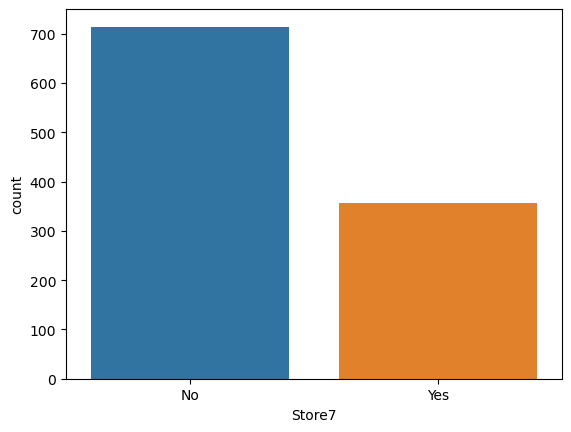

In [37]:
sns.countplot(df, x='Store7', hue='Store7')
plt.show()

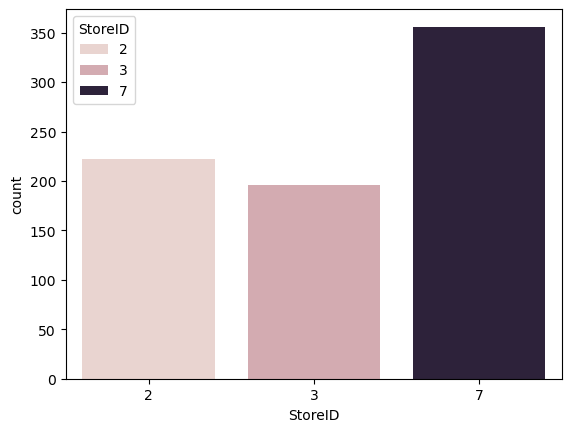

In [44]:
# гистограмма трех "популярных" магазинов
sns.countplot(df[df['StoreID'].isin(df['StoreID'].value_counts().head(3).index)], 
              x='StoreID', hue='StoreID')
plt.show()

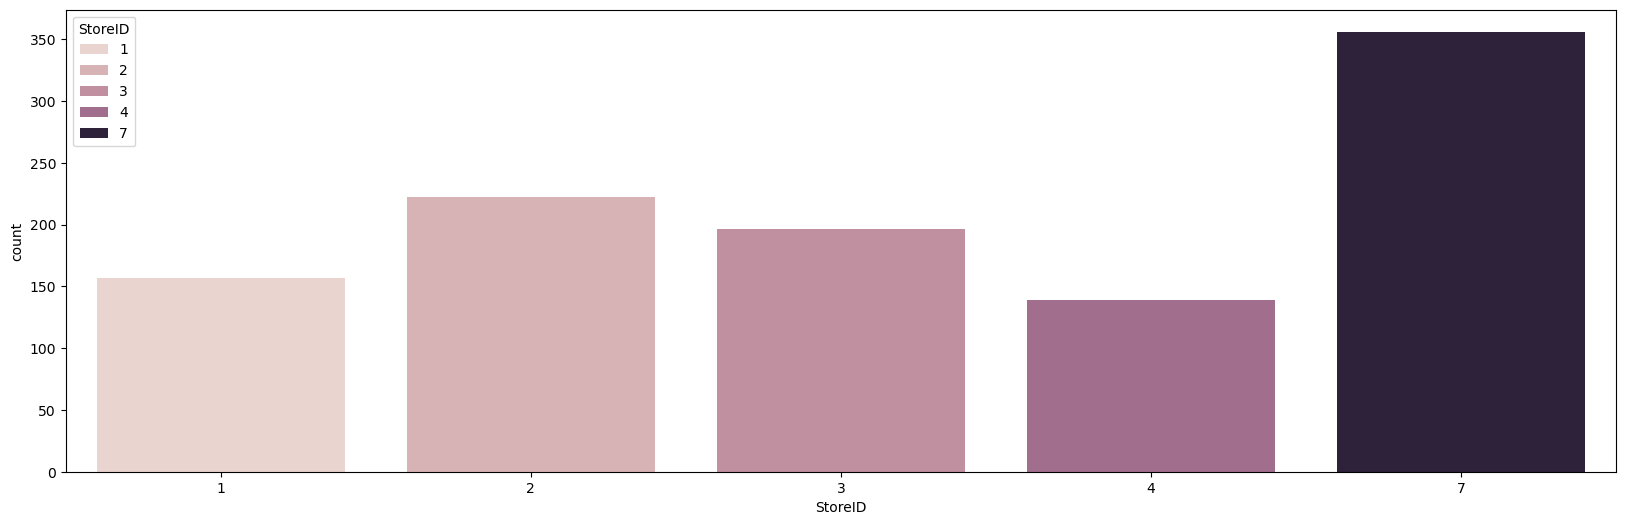

In [43]:
# гистограмма для всех магазинов
fig = plt.subplots(figsize = (20, 6))
sns.countplot(df, x='StoreID', hue='StoreID')
plt.show()

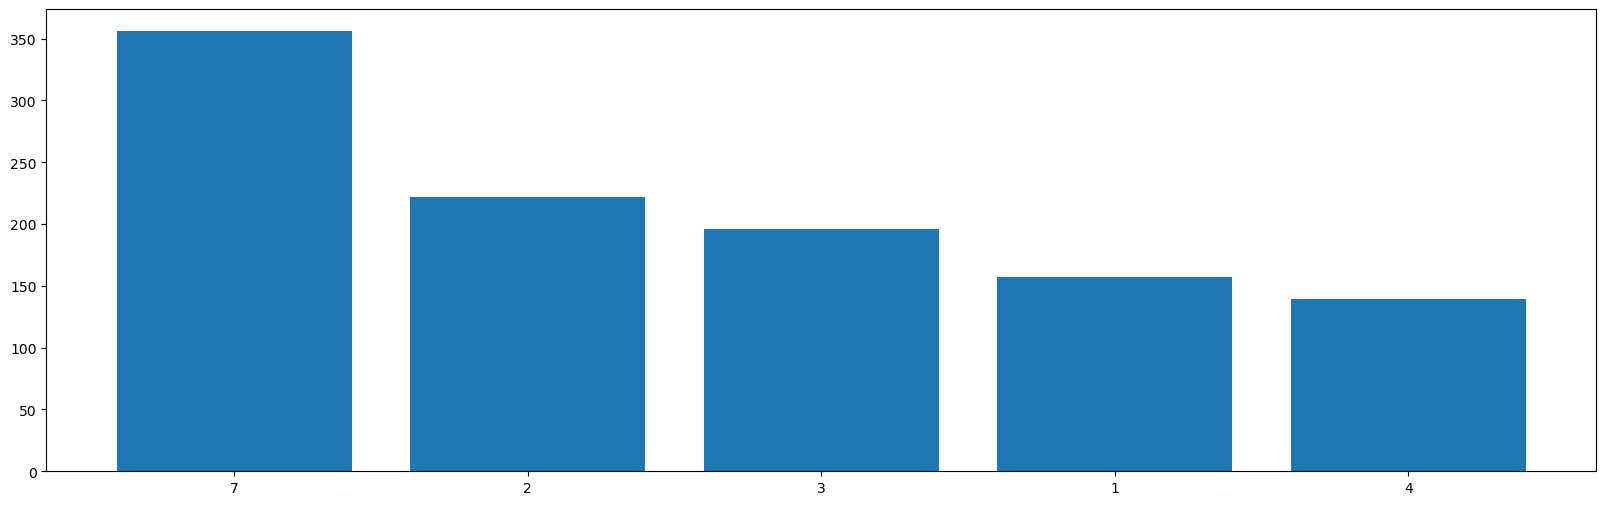

In [52]:
storeid_counts = df['StoreID'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(storeid_counts.index.astype(str), storeid_counts.values)
plt.show()

Рассмотрим пример, демонстрирующий распределение показателей, связанных с финансовыми затратами клиентов. Можно сказать, что это все показатели, содержащие подстроку "Price" в имени показателя, кроме "ListPriceDiff". Ниже представлен код для отбора требуемых показателей.

In [55]:
# список колонок
df.columns

Index(['Id', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM',
       'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE'],
      dtype='object')

In [64]:
# Отбор числовых признаков, содержащих подстроку "Price"
feats = [f for f in df.columns if "Diff" not in f and "Price" in f]
feats

['PriceCH', 'PriceMM', 'SalePriceMM', 'SalePriceCH']

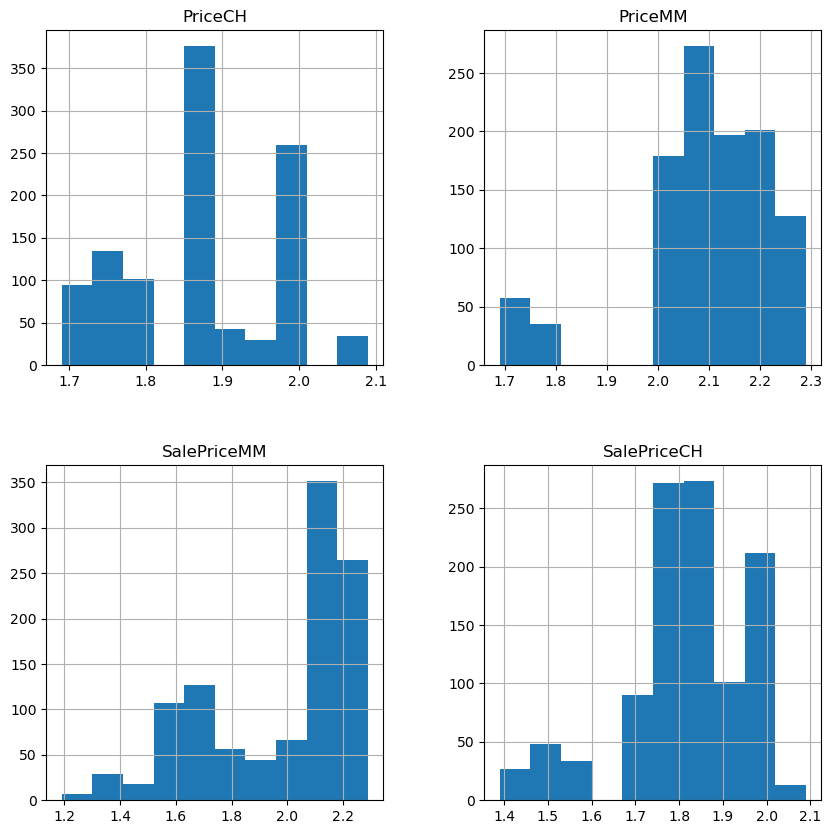

In [65]:
# строим отдельные гистограммы для нескольких признаков
df[feats].hist(figsize=(10,10))
plt.show()

Часто используют попарное сравнение признаков для обеспечения широкого взгляда на набор данных. На диогональных графика представлены гистограммы распределения отдельного признака, на недиагональных позициях - попарные распределения

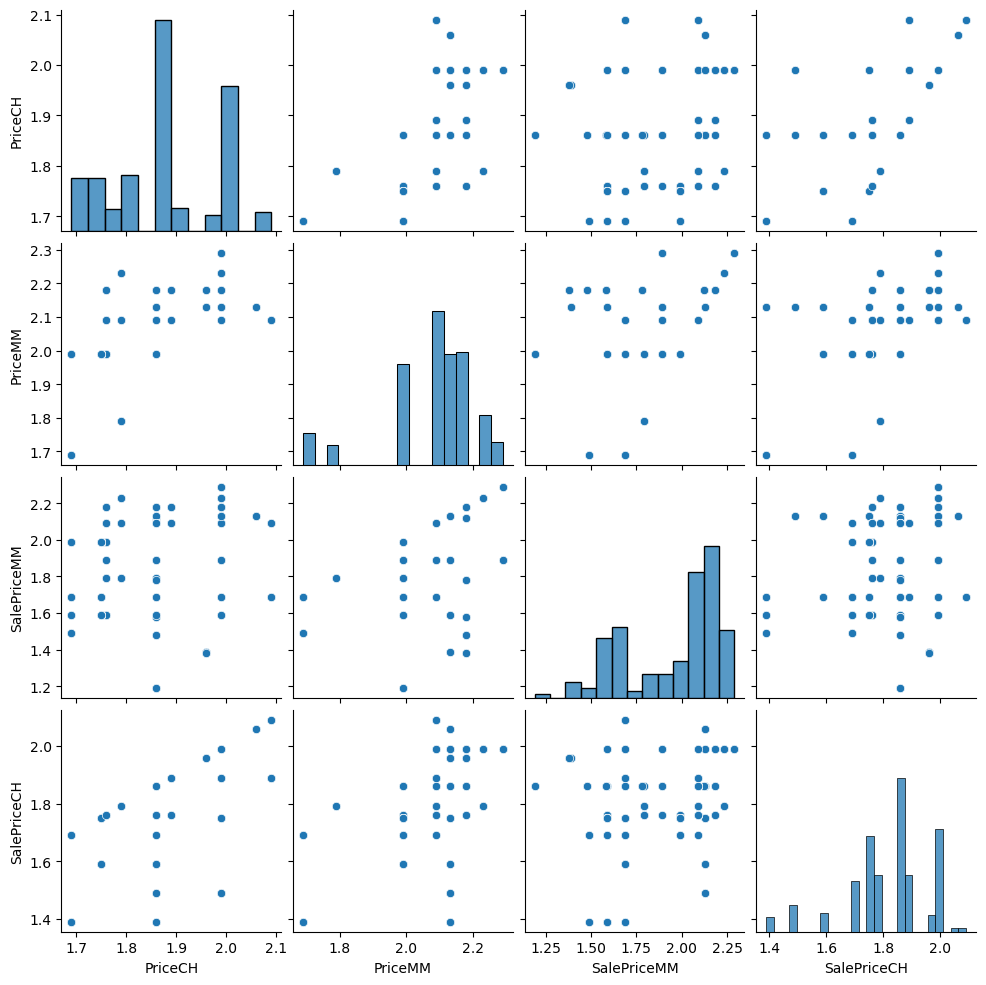

In [66]:
sns.pairplot(df[feats])
plt.show()

Можно реализовать более сложные графики. Например добавить еще один целевой признак Purchase и раскрасить типы элементов.

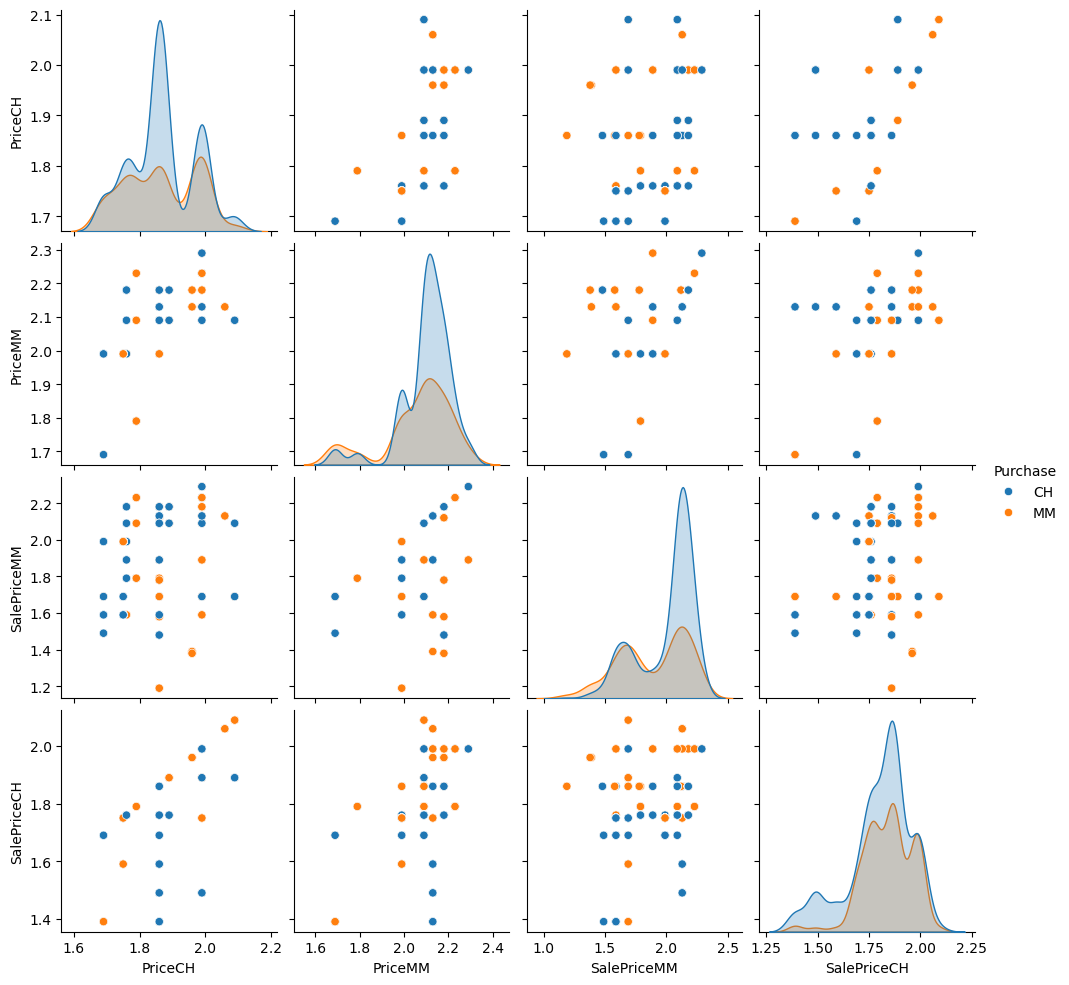

In [70]:
sns.pairplot(df[feats + ['Purchase']], hue='Purchase')
plt.show()

Использование Matplotlib, подписей данных, заголовков. Использование простейших пользовательских цветов

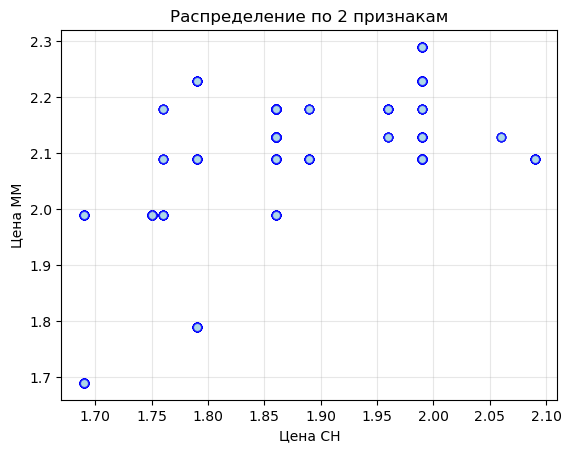

In [71]:
plt.scatter(juice_df['PriceCH'], juice_df['PriceMM'], color='lightblue', edgecolors='blue', alpha=0.6)
plt.xlabel('Цена CH')
plt.ylabel('Цена MM')
plt.title('Распределение по 2 признакам')
plt.grid(True, alpha=0.3)
plt.show()

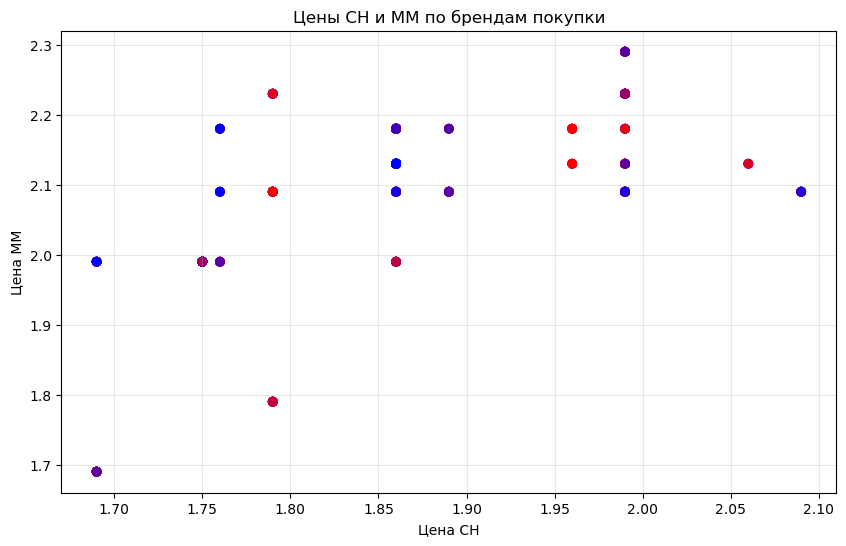

In [73]:
# Раскрашивание данных, цвет в зависимости от того, какой сок был куплен
colors = df['Purchase'].map({'CH': 'blue', 'MM': 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(juice_df['PriceCH'], juice_df['PriceMM'], c=colors, alpha=0.6)
plt.xlabel('Цена CH')
plt.ylabel('Цена MM')
plt.title('Цены CH и MM по брендам покупки')
plt.grid(True, alpha=0.3)
plt.show()

### 7. Корреляция признаков
В реальных задачах МО при первичном анализе данных необходимо выявить корреляции признаков обучающей выборки. В пакете Pandas имеется встроенный инструмент для этого - метод corr() класса DataFrame. Ниже показан фрагмент вывода этой функции.

In [74]:
df.corr(numeric_only=True)

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
Id,1.000000,-0.071130,-0.052550,-0.144414,-0.081547,0.012560,0.036619,0.058063,0.037842,-0.265390,-0.074354,-0.112993,-0.009529,0.039345,0.015216,0.035031,-0.167845
WeekofPurchase,-0.071130,1.000000,0.096046,0.704324,0.576872,0.365722,0.242334,0.107866,0.070688,0.192897,0.101719,0.201256,-0.011610,0.223533,0.355047,0.053038,-0.053652
StoreID,-0.052550,0.096046,1.000000,0.020815,0.093344,0.333182,0.010619,0.379360,-0.171641,0.237333,0.040655,-0.258172,0.174144,0.014302,0.334715,0.096913,-0.531597
PriceCH,-0.144414,0.704324,0.020815,1.000000,0.616402,0.151900,0.116310,-0.099056,-0.018026,0.077793,0.229383,0.586716,-0.096335,0.099157,0.134601,-0.177935,0.399570
PriceMM,-0.081547,0.576872,0.093344,0.616402,1.000000,0.065206,-0.001246,-0.031281,-0.068340,0.115570,0.532859,0.384941,0.292594,-0.021747,0.059964,0.665187,0.106612
DiscCH,0.012560,0.365722,0.333182,0.151900,0.065206,1.000000,0.018035,0.534775,-0.046952,0.139400,0.019416,-0.711274,0.393615,0.014718,0.999022,-0.062551,-0.243812
DiscMM,0.036619,0.242334,0.010619,0.116310,-0.001246,0.018035,1.000000,0.156636,0.465792,-0.020292,-0.846868,0.067940,-0.823908,0.998793,0.018521,-0.111848,-0.125917
SpecialCH,0.058063,0.107866,0.379360,-0.099056,-0.031281,0.534775,0.156636,1.000000,-0.154170,0.137058,-0.149182,-0.508586,0.129713,0.160750,0.549015,0.054838,-0.321847
SpecialMM,0.037842,0.070688,-0.171641,-0.018026,-0.068340,-0.046952,0.465792,-0.154170,1.000000,-0.088246,-0.430499,0.025648,-0.414135,0.466546,-0.051138,-0.068311,-0.083691
LoyalCH,-0.265390,0.192897,0.237333,0.077793,0.115570,0.139400,-0.020292,0.137058,-0.088246,1.000000,0.078631,-0.058887,0.104261,-0.022460,0.138684,0.070659,-0.103126


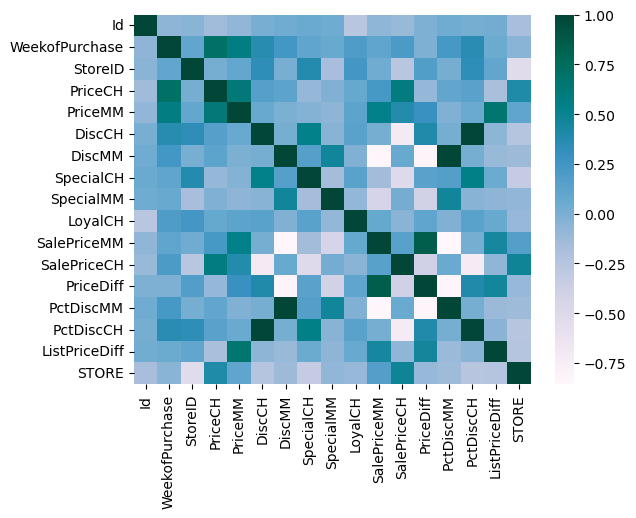

In [77]:
# Полученная матрица имеет размер 17 * 17. Используем спец. тип графика heatmap.
sns.heatmap(df.corr(numeric_only=True), cmap=plt.cm.PuBuGn)
plt.show()

Коррелирующие признаки обычно удаляются и не рассматриваются в процессе обучения.

In [89]:
correlation_matrix = df.corr(numeric_only=True)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))
            print(f"Высокая корреляция: {col1} и {col2}: {corr_value:.3f}")

# Собираем все признаки для удаления (второй признак из каждой пары)
cols_to_remove = set()
for col1, col2, corr_value in high_corr_pairs:
    cols_to_remove.add(col2)
    print(f"Будет удален признак: {col2} (корреляция с {col1}: {corr_value:.3f})")

# Удаление всех коррелирующих признаков
if cols_to_remove:
    print(f"\nУдаляем признаки: {list(cols_to_remove)}")
    df_uncorr = df.drop(columns=cols_to_remove)
    print(f"Оставшиеся признаки: {list(df_uncorr.columns)}")
else:
    df_uncorr = df.copy()
    print("Сильно коррелирующих признаков не найдено")

Высокая корреляция: DiscCH и PctDiscCH: 0.999
Высокая корреляция: DiscMM и SalePriceMM: -0.847
Высокая корреляция: DiscMM и PriceDiff: -0.824
Высокая корреляция: DiscMM и PctDiscMM: 0.999
Высокая корреляция: SalePriceMM и PriceDiff: 0.853
Высокая корреляция: SalePriceMM и PctDiscMM: -0.857
Высокая корреляция: PriceDiff и PctDiscMM: -0.828
Будет удален признак: PctDiscCH (корреляция с DiscCH: 0.999)
Будет удален признак: SalePriceMM (корреляция с DiscMM: -0.847)
Будет удален признак: PriceDiff (корреляция с DiscMM: -0.824)
Будет удален признак: PctDiscMM (корреляция с DiscMM: 0.999)
Будет удален признак: PriceDiff (корреляция с SalePriceMM: 0.853)
Будет удален признак: PctDiscMM (корреляция с SalePriceMM: -0.857)
Будет удален признак: PctDiscMM (корреляция с PriceDiff: -0.828)

Удаляем признаки: ['PctDiscMM', 'PriceDiff', 'PctDiscCH', 'SalePriceMM']
Оставшиеся признаки: ['Id', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'L

Перестраиваем heatmap без коррелирующих признаков

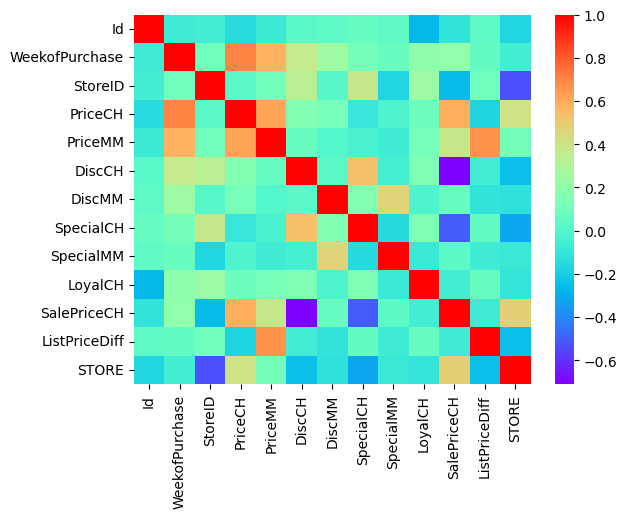

In [90]:
sns.heatmap(df_uncorr.corr(numeric_only=True), cmap=plt.cm.rainbow)
plt.show()